### 使用scikit-learn中的kNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [4]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [5]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [6]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
X_train[y_train==0, 0]

array([3.39353321, 3.11007348, 1.34380883, 3.58229404, 2.28036244])

In [8]:
X_train[y_train==0, 1]

array([2.33127338, 1.78153964, 3.36836095, 4.67917911, 2.86699026])

In [9]:
y_train==0

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

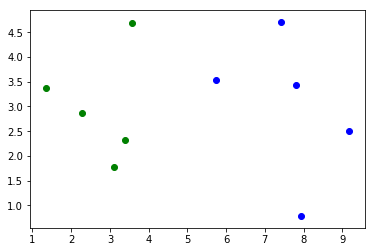

In [12]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color = 'g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color = 'b')

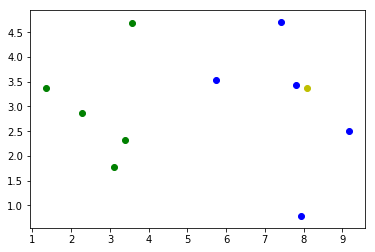

In [13]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='b')
plt.scatter(x[0], x[1], color='y')

In [22]:
for x_train in X_train:
    print(x_train - x)
    print((x_train - x) ** 2)
    print(np.sum((x_train - x) ** 2))
    print("========================")

[-4.70007411 -1.03445813]
[22.09069661  1.07010363]
23.1608002402217
[-4.98353384 -1.58419188]
[24.83560948  2.5096639 ]
27.34527338457421
[-6.74979849e+00  2.62944000e-03]
[4.55597796e+01 6.91395471e-06]
45.5597865290622
[-4.51131328  1.3134476 ]
[20.35194747  1.72514459]
22.077092061652028
[-5.81324488 -0.49874125]
[33.79381602  0.24874284]
34.04255885866877
[-0.67017038  1.33079136]
[0.44912833 1.77100565]
2.220133979380214
[-2.34855532  0.16825829]
[5.5157121  0.02831085]
5.5440229476146206
[ 1.0785613  -0.85463047]
[1.16329449 0.73039324]
1.8936877250293382
[-0.30082384  0.05835743]
[0.09049498 0.00340559]
0.09390057019346303
[-0.1537865  -2.57409428]
[0.02365029 6.62596138]
6.649611665663107


In [23]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)

In [24]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [27]:
nearest = np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [28]:
K = 6

In [30]:
topK_y = [y_train[i] for i in nearest[:K]]
topK_y

[1, 1, 1, 1, 1, 0]

In [32]:
from collections import Counter
Counter(topK_y) # 计算各元素的个数

Counter({1: 5, 0: 1})

In [33]:
votes = Counter(topK_y)

In [40]:
votes.most_common(2) # 找出元素最多的2个元素   注意是

[(1, 5), (0, 1)]

In [47]:
votes.most_common(1) # 找出元素个数最多的1个元素

[(1, 5)]

In [44]:
predict_y = votes.most_common(1)[0][0]

In [45]:
predict_y

1

In [49]:
%run Myscript/kNN.py

In [52]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [54]:
predict_y = kNN_classify(6, X_train, y_train, x)
predict_y

1


### 使用scikit-learn中的kNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)  # 最相邻的6个

In [57]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [59]:
X_predict = x.reshape(1, -1)
X_predict

array([[8.09360732, 3.36573151]])

In [60]:
kNN_classifier.predict(X_predict)

array([1])

### 使用自己整理后的kNN

In [61]:
%run Myscript/kNN/kNNv2.py

In [62]:
knn_clf = KNNClassifier(k = 6)

In [63]:
knn_clf.fit(X_train, y_train)

kNN(k=6)

In [65]:
y_predict = knn_clf.predict(X_predict)

In [66]:
y_predict

array([1])